In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
table = pd.read_csv('Detailed_statistics_airborne-2.csv')

In [3]:
table = table.dropna()

In [4]:
crit = table[table['Airborne Time (Minutes)'] == 0].index
table = table.drop(crit)

In [5]:
date = np.array(table['Date (MM/DD/YYYY)'])
number_date = []
for dat in date:
    t = dat.split("/")
    number_date.append(t)

In [6]:
table['Good Date'] = number_date

In [12]:
from collections import defaultdict

In [29]:
table

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Good Date
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0,"[01, 01, 2004]"
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0,"[01, 01, 2004]"
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0,"[01, 01, 2004]"
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0,"[01, 01, 2004]"
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,"[01, 01, 2004]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0,"[07, 02, 2020]"
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,"[07, 03, 2020]"
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0,"[07, 04, 2020]"
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0,"[07, 05, 2020]"


In [39]:
date = defaultdict(list)
date['spring'] = []
date['winter'] = []
date['summer'] = []
date['autumn'] = []
for idx in table.index:
    if((table.loc[idx]['Good Date'][0] == '01') or (table.loc[idx]['Good Date'][0] == '02') or (table.loc[idx]['Good Date'][0] == '12')):
        date['winter'].append(table.loc[idx]['Airborne Time (Minutes)'])
    if((table.loc[idx]['Good Date'][0] == '03') or (table.loc[idx]['Good Date'][0] == '04') or (table.loc[idx]['Good Date'][0] == '05')):
        date['spring'].append(table.loc[idx]['Airborne Time (Minutes)'])
    if((table.loc[idx]['Good Date'][0] == '06') or (table.loc[idx]['Good Date'][0] == '07') or (table.loc[idx]['Good Date'][0] == '08')):
        date['summer'].append(table.loc[idx]['Airborne Time (Minutes)']) 
    if((table.loc[idx]['Good Date'][0] == '09') or (table.loc[idx]['Good Date'][0] == '10') or (table.loc[idx]['Good Date'][0] == '11')):
        date['autumn'].append(table.loc[idx]['Airborne Time (Minutes)'])  

In [45]:
y = date['spring'] + sts.uniform.rvs(size = len(date['spring']))

In [46]:
from statsmodels.distributions import ECDF

In [50]:
c0,c1,c2 = sts.lognorm.fit(y)

In [52]:
print(c0,c1,c2)

0.3187190318357259 40.701413428731584 15.598547998423218


In [47]:
ecdfy = ECDF(y)


In [82]:
from scipy.stats import kstest

Text(0.5, 0, 'Airborne Time (Minutes) : Lognorm(s = 0.327, loc = 41.098, scale = 15.177)')

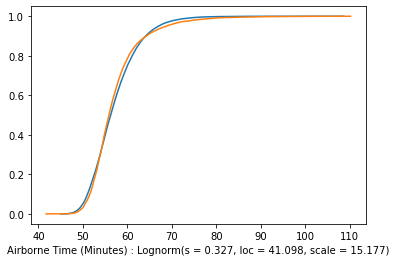

In [87]:
y = date['spring'] + sts.uniform.rvs(size = len(date['spring']))
c0,c1,c2 = sts.lognorm.fit(y)
ecdfy = ECDF(y)
val = sts.lognorm.rvs(size = 30000, s = c0, loc = c1, scale = c2)
ecdfval = ECDF(val)
plt.plot(ecdfval.x, ecdfval.y)
plt.plot(ecdfy.x, ecdfy.y)
plt.xlabel(str.format('Airborne Time (Minutes) : Lognorm(s = {0:.3f}, loc = {1}, scale = {2})', round(c0, 3), round(c1,3), round(c2,3)))

In [89]:
kstest(y, 'lognorm', (c0,c1,c2))

KstestResult(statistic=0.04801049314240613, pvalue=7.646961854100664e-16)

Text(0.5, 0, 'Airborne Time (Minutes) : Lognorm(s = 0.445, loc = 44.613, scale = 8.229)')

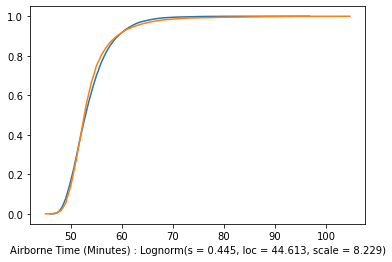

In [90]:
y = date['summer'] + sts.uniform.rvs(size = len(date['summer']))
c0,c1,c2 = sts.lognorm.fit(y)
ecdfy = ECDF(y)
val = sts.lognorm.rvs(size = 30000, s = c0, loc = c1, scale = c2)
ecdfval = ECDF(val)
plt.plot(ecdfval.x, ecdfval.y)
plt.plot(ecdfy.x, ecdfy.y)
plt.xlabel(str.format('Airborne Time (Minutes) : Lognorm(s = {0:.3f}, loc = {1}, scale = {2})', round(c0, 3), round(c1,3), round(c2,3)))

In [91]:
kstest(y, 'lognorm', (c0,c1,c2))

KstestResult(statistic=0.04947406720402869, pvalue=8.452009341070748e-17)

Text(0.5, 0, 'Airborne Time (Minutes) : Lognorm(s = 0.105, loc = 5.316, scale = 50.029)')

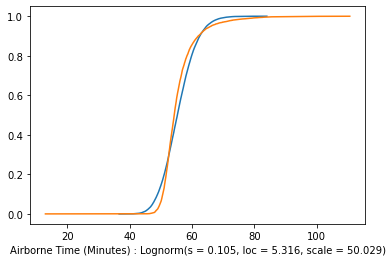

In [98]:
y = date['autumn'] + sts.uniform.rvs(size = len(date['autumn']))
c0,c1,c2 = sts.lognorm.fit(y)
ecdfy = ECDF(np.sort(y))
val = sts.lognorm.rvs(size = 30000, s = c0, loc = c1, scale = c2)
ecdfval = ECDF(val)
plt.plot(ecdfval.x, ecdfval.y)
plt.plot(ecdfy.x, ecdfy.y)
plt.xlabel(str.format('Airborne Time (Minutes) : Lognorm(s = {0:.3f}, loc = {1}, scale = {2})', round(c0, 3), round(c1,3), round(c2,3)))

In [115]:
kstest(y, 'lognorm', (c0,c1,c2))

KstestResult(statistic=0.034196810600471195, pvalue=3.477114934734855e-08)

Text(0.5, 0, 'Airborne Time (Minutes) : Lognorm(s = 0.510, loc = 45.36, scale = 9.7)')

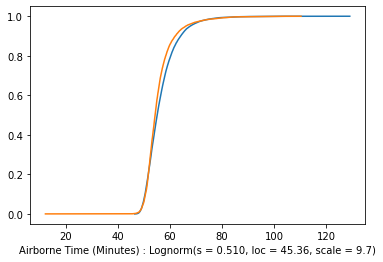

In [113]:
y = date['autumn'] + sts.uniform.rvs(size = len(date['autumn']))
c0,c1,c2 = sts.lognorm.fit(y)
ecdfy = ECDF(np.sort(y))
c0= 0.51
c1 = 45.36
c2 = 9.7
val = sts.lognorm.rvs(size = 30000, s = c0, loc = c1, scale = c2)
ecdfval = ECDF(val)
plt.plot(ecdfval.x, ecdfval.y)
plt.plot(ecdfy.x, ecdfy.y)
plt.xlabel(str.format('Airborne Time (Minutes) : Lognorm(s = {0:.3f}, loc = {1}, scale = {2})', round(c0, 3), round(c1,3), round(c2,3)))

In [116]:
kstest(y, 'lognorm', (c0,c1,c2))

KstestResult(statistic=0.034196810600471195, pvalue=3.477114934734855e-08)

Text(0.5, 0, 'Airborne Time (Minutes) : Lognorm(s = 0.472, loc = 44.677, scale = 12.501)')

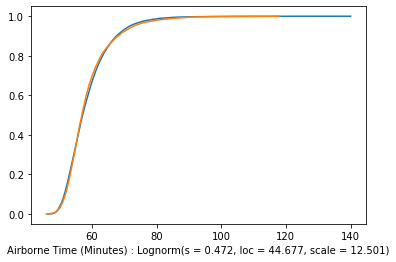

In [114]:
y = date['winter'] + sts.uniform.rvs(size = len(date['winter']))
c0,c1,c2 = sts.lognorm.fit(y)
ecdfy = ECDF(np.sort(y))
val = sts.lognorm.rvs(size = 30000, s = c0, loc = c1, scale = c2)
ecdfval = ECDF(val)
plt.plot(ecdfval.x, ecdfval.y)
plt.plot(ecdfy.x, ecdfy.y)
plt.xlabel(str.format('Airborne Time (Minutes) : Lognorm(s = {0:.3f}, loc = {1}, scale = {2})', round(c0, 3), round(c1,3), round(c2,3)))

In [117]:
bymonths = defaultdict(list)

In [118]:
for idx in table.index:
    bymonths[table.loc[idx]['Good Date'][0]].append(table.loc[idx]['Airborne Time (Minutes)'])

In [122]:
res = []
for idx in bymonths.keys():
    res.append(np.mean(bymonths[idx]))

Text(0, 0.5, 'Time')

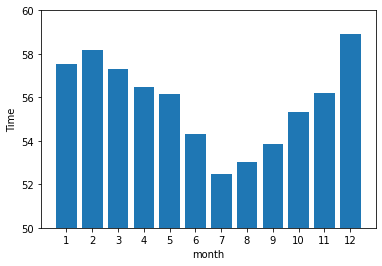

In [123]:
plt.bar(['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12'], res)
plt.ylim([50,60])
plt.xlabel('month')
plt.ylabel('Time')

In [148]:
from statsmodels.distributions.empirical_distribution import ECDF

In [383]:
u = sts.uniform.rvs(size = len(autumn))

In [8]:
ww = np.sort(spring)

NameError: name 'spring' is not defined

In [385]:
y = ECDF(np.sort(autumn) + u)

In [386]:
sts.lognorm.fit(np.sort(autumn) + u)

(2.4736440494802867, 43.47117796134698, 1.2555704466536004)

(40.0, 115.0)

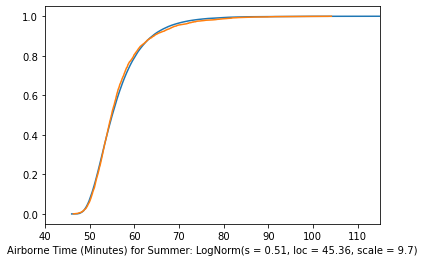

In [381]:
w = sts.lognorm.rvs(size = 300000, s = 2.47, loc = 43.4, scale = 1.25)
vals = ECDF(w)
plt.plot(vals.x, vals.y)
plt.plot(y.x, y.y)
plt.xlabel('Airborne Time (Minutes) for Autumn: LogNorm(s = 0.51, loc = 45.36, scale = 9.7)')
plt.xlim([40,115])

In [65]:
w = sts.weibull_min.rvs(size = 3000, c = 0.3653, loc = 44.485, scale = 1.3703)

In [18]:
y = ECDF(w)

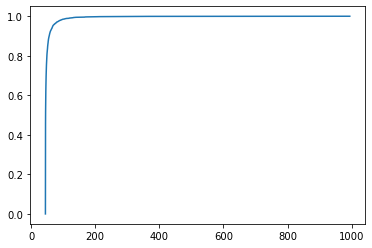

In [19]:
plt.plot(y.x, y.y)

In [20]:
from scipy.stats import kstest

In [21]:
kstest(np.sort(winter) + u, sts.weibull_min.cdf(winter, c = 0.365))

KstestResult(statistic=1.0, pvalue=0.0)

(array([  3.,   5.,  60., 110., 218., 638., 314., 527., 215., 173., 242.,
         74.,  76.,  96.,  38.,  59.,  25.,  18.,  44.,  15.,  15.,  25.,
          7.,  15.,   3.,   4.,   5.,   0.,   6.,   4.,   2.,   4.,   0.,
          1.,   2.,   0.,   2.,   1.,   0.,   4.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 44.  ,  45.38,  46.76,  48.14,  49.52,  50.9 ,  52.28,  53.66,
         55.04,  56.42,  57.8 ,  59.18,  60.56,  61.94,  63.32,  64.7 ,
         66.08,  67.46,  68.84,  70.22,  71.6 ,  72.98,  74.36,  75.74,
         77.12,  78.5 ,  79.88,  81.26,  82.64,  84.02,  85.4 ,  86.78,
         88.16,  89.54,  90.92,  92.3 ,  93.68,  95.06,  96.44,  97.82,
         99.2 , 100.58, 101.96, 103.34, 104.72, 106.1 , 107.48, 108.86,
        110.24, 111.62, 113.  ]),
 <BarContainer object of 50 artists>)

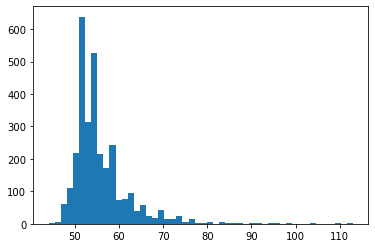

In [22]:
plt.hist(winter, bins = 50)

(array([  1.,   0.,   2.,  15.,  43., 266., 264., 317., 339., 320., 274.,
        402., 146., 115.,  90.,  61.,  91.,  42.,  32.,  34.,  25.,  16.,
         40.,  14.,  11.,  12.,   6.,   9.,   3.,   2.,   4.,   1.,   3.,
          4.,   1.,   4.,   3.,   2.,   5.,   3.,   0.,   0.,   0.,   2.,
          0.,   1.,   1.,   0.,   0.,   1.]),
 array([ 43.  ,  44.18,  45.36,  46.54,  47.72,  48.9 ,  50.08,  51.26,
         52.44,  53.62,  54.8 ,  55.98,  57.16,  58.34,  59.52,  60.7 ,
         61.88,  63.06,  64.24,  65.42,  66.6 ,  67.78,  68.96,  70.14,
         71.32,  72.5 ,  73.68,  74.86,  76.04,  77.22,  78.4 ,  79.58,
         80.76,  81.94,  83.12,  84.3 ,  85.48,  86.66,  87.84,  89.02,
         90.2 ,  91.38,  92.56,  93.74,  94.92,  96.1 ,  97.28,  98.46,
         99.64, 100.82, 102.  ]),
 <BarContainer object of 50 artists>)

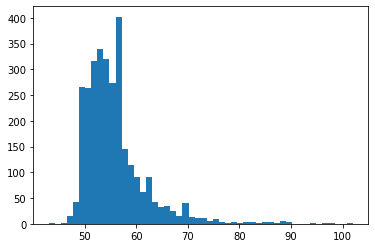

In [23]:
plt.hist(autumn, bins = 50)

In [24]:
c0, c1, c2 = sts.lognorm.fit(spring)

In [25]:
c0,c1,c2

(0.4493023402298564, 43.61960532497915, 10.833579481814592)

In [26]:
c0, c1, c2 = sts.lognorm.fit(summer)

In [27]:
c0,c1,c2

(0.5140074987950717, 44.829966239157685, 9.74252908501002)

In [28]:
c0, c1, c2 = sts.lognorm.fit(autumn)

In [29]:
c0, c1, c2

(0.3846475245399936, 42.34569608716964, 12.426210701599384)